In [ ]:
#Part1

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import os
import statistics as s

In [ ]:
def load_data(train_batch_size, test_batch_size):
    # Fetch training data: total 60000 samples
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('data', train = True, download=True,
                       transform=transforms.Compose([
                           transforms.Resize((32, 32)),
                           transforms.ToTensor()
                       ])),
        batch_size = train_batch_size, shuffle=True)

    # Fetch test data: total 10000 samples
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('data', train = False, transform=transforms.Compose([
            transforms.Resize((32, 32)),
            transforms.ToTensor()
        ])),
        batch_size = test_batch_size, shuffle=True)

    return (train_loader, test_loader)

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # flatten as one dimension
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        x = self.fc3(x)
        return x

In [ ]:
def define_optimizer(model,learn_rate):
    return optim.SGD(model.parameters(), lr=Learn_rate,momentum=0.9,nesterov=True)

In [ ]:
def train(model, optimizer, train_loader):
    model.train()

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()

        # Forward propagation
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

In [ ]:
def calculate_loss(model, loader, loss_fn):
    correct = 0
    total = 0
    costTotal = 0
    costCounter = 0
    with torch.no_grad():
        for batch in loader:
            data, target = batch
            output = model(data)
            cost = loss_fn(output, target)
            costTotal += cost
            costCounter += 1
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == target[i]:
                    correct += 1
                total += 1
    return costTotal / costCounter, round(correct/total, 3)

In [ ]:
loss_train_arr = []
loss_test_arr = []
test_acc_arr = []
train_acc_arr = []
def compute_metrics(model, optimizer):

    for epoch in range(1, epochs + 1):
        train(model, optimizer, train_loader)
        tr_loss, tr_acc = calculate_loss(model, train_loader, loss_fn)
        t_loss, t_acc = calculate_loss(model, test_loader, loss_fn)
        print("Model Train loss: ", tr_loss)
        loss_train_arr.append(tr_loss)
        loss_test_arr.append(t_loss)
        train_acc_arr.append(tr_acc)
        test_acc_arr.append(t_acc)
    return loss_train_arr, loss_test_arr, train_acc_arr, test_acc_arr

In [ ]:
epochs = 30
torch.manual_seed(1)
loss_fn = torch.nn.CrossEntropyLoss()
train_loader, test_loader = load_data(64, 64)
m1 = CNN()
optimizer = define_optimizer(m1,1e-2)
print("Starting Batch 1")
batch_1_train_loss, batch_1_test_loss, batch_1_train_acc, batch_1_test_acc = compute_metrics(m1, optimizer)

batch_param_1 = torch.nn.utils.parameters_to_vector(m1.parameters())

torch.manual_seed(1)
loss_fn = torch.nn.CrossEntropyLoss()
train_loader, test_loader = load_data(1024, 1024)
m2 = CNN()
optimizer = define_optimizer(m2,1e-2)
print("Moving to Batch 2")
batch_2_train_loss, batch_2_test_loss, batch_2_train_acc, batch_2_test_acc = compute_metrics(m2, optimizer)

batch_param_2 = torch.nn.utils.parameters_to_vector(m2.parameters())

Starting Batch 1
Model Train loss:  tensor(0.0911)
Model Train loss:  tensor(0.0890)
Model Train loss:  tensor(0.0420)
Model Train loss:  tensor(0.0348)
Model Train loss:  tensor(0.0447)
Model Train loss:  tensor(0.0252)
Model Train loss:  tensor(0.0207)
Model Train loss:  tensor(0.0137)
Model Train loss:  tensor(0.0140)
Model Train loss:  tensor(0.0111)
Model Train loss:  tensor(0.0099)
Model Train loss:  tensor(0.0086)
Model Train loss:  tensor(0.0120)
Model Train loss:  tensor(0.0078)
Model Train loss:  tensor(0.0049)
Model Train loss:  tensor(0.0085)
Model Train loss:  tensor(0.0075)
Model Train loss:  tensor(0.0049)
Model Train loss:  tensor(0.0059)
Model Train loss:  tensor(0.0041)
Model Train loss:  tensor(0.0035)
Model Train loss:  tensor(0.0052)
Model Train loss:  tensor(0.0041)
Model Train loss:  tensor(0.0076)
Model Train loss:  tensor(0.0041)
Model Train loss:  tensor(0.0036)
Model Train loss:  tensor(0.0016)
Model Train loss:  tensor(0.0012)
Model Train loss:  tensor(0.000

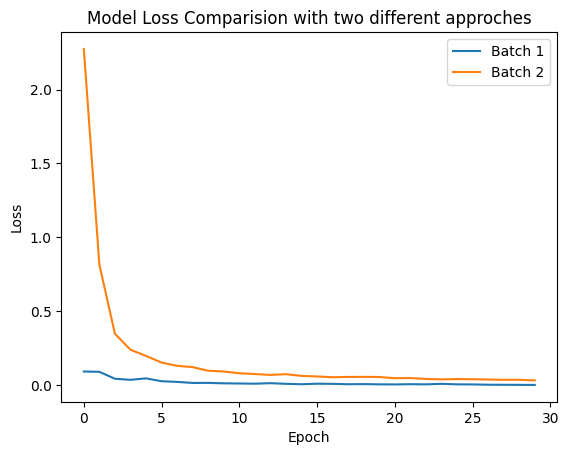

In [ ]:
plt.plot( batch_1_train_loss)
plt.plot( batch_2_train_loss)
plt.title('Model Loss Comparision with two different approches')
plt.legend(['Batch 1', 'Batch 2'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


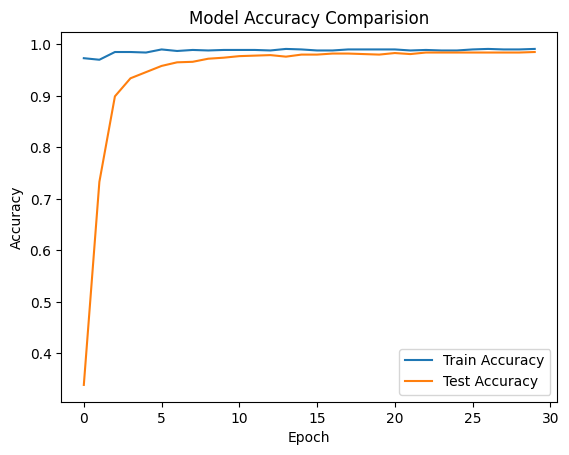

In [ ]:
plt.plot( batch_1_test_acc)
plt.plot( batch_2_test_acc)
plt.title('Model Accuracy Comparision')
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
alpha = np.linspace(-5,5, num = 31)
Parameters =[]
for i in range (len(alpha)):
    theta = (1-alpha[i])*batch_param_1 + alpha[i]* batch_param_2
    Parameters.append(theta)